# Sentiment analysis with pygooglenews library

**News Sentiment Trading - Long / Short**

**Pipeline:**
* **1. Sentiment analysis** - read in news with pygooglenews library and perform sentiment analysis
    * **1.1 Setup** - defining functions for future use
    * **1.2 Get article dataframes for specific stocks** - get articles with pygooglenews library and store them in pandas dataframe 
    * **1.3 Assign sentiment scores** - Assigning sentiment score for each article 
    * **1.4 Get stock historical prices** - Get history of stock prices over time 
    * **1.5 Calculate PnL for Long Short Strategy** - Calculating PnL for each article and combining information into one dataframe 
    * **1.6 Calculate and visualize cumulative pnl** - Visualising collected data for each stock

**Strategy:**
* **Positive News Sentiment** - if market opens on positive news, short the stock from market open to market close 
* **Negative News Sentiment** - if market opens on negative news, go long - buy on open, sell on close

See more at:
*   https://www.altsignals.ai
*   https://colab.research.google.com/drive/1ARvktpx6Axq6tINPwhv_0utQhLcgnasl?usp=sharing

###### Load dependency libraries 

In [1]:
from pygooglenews import GoogleNews
from bs4 import BeautifulSoup
from langdetect import detect
import pandas as pd
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display, DisplayObject
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## 1. Sentiment analysis for google news

### 1.1 Setup

###### Create GoogleNews Object

In [2]:
gn = GoogleNews()

###### Return dataframe of articles that mention queried ticker

In [3]:
def remove_html_tags(html):
    return BeautifulSoup(html).get_text()

def get_news_dataframe(ticker, query, timeframe):
    end_date = pd.to_datetime('today').date()
    start_date = end_date - timedelta(days=timeframe)  
    delta = timedelta(days=1)
    
    data = []
    
    while start_date <= end_date:
        
        result = gn.search(query, from_=str(start_date), to_=str(start_date + delta))
        
        for entry in result["entries"]:   
            title = entry['title']
            summary = remove_html_tags(entry['summary'])
            published = datetime.strptime(entry['published'], "%a, %d %b %Y %H:%M:%S %Z")
            link = entry['link']
            source = entry['source']['title']
            language = detect(summary)

            data.append({
                'title': title,
                'summary': summary,
                'published': published,
                'link': link,
                'source': source,
                'language': language,
                'ticker': ticker
            })
            
        start_date += delta
    
    news_df = pd.DataFrame(data)
    news_df = news_df.drop_duplicates(subset=['title', 'summary', 'ticker', 'published'], keep='first')
    
    return news_df


### 1.2 Get article dataframes for specific stocks

Stocks:  
1. MRNA (Moderna)
2. PENN (Penn National Gaming)
3. NVDA (Nvidia)

#### 1.2.MRNA

In [4]:
mrna_articles_df = get_news_dataframe(ticker='MRNA', query='MRNA AND Moderna', timeframe=30)

display(mrna_articles_df.head())
display(f"Rows: {len(mrna_articles_df.index)}")

,title,summary,published,link,source,language,ticker
0,How scientists can 'copy and paste' Covid vacc...,How scientists can 'copy and paste' Covid vacc...,2021-01-28 08:00:00,https://www.cnbc.com/2021/01/28/why-mrna-vacci...,CNBC,en,MRNA
1,Why it takes 2 shots to make mRNA vaccines do ...,Why it takes 2 shots to make mRNA vaccines do ...,2021-01-28 08:00:00,https://theconversation.com/why-it-takes-2-sho...,The Conversation US,en,MRNA
2,How mRNA Vaccines Prevent COVID-19 | NYU Lango...,How mRNA Vaccines Prevent COVID-19 | NYU Lango...,2021-01-28 08:00:00,https://nyulangone.org/news/how-mrna-vaccines-...,NYU Langone Health,en,MRNA
3,Worldwide RNA Vaccine Patent Industry Report 2...,Worldwide RNA Vaccine Patent Industry Report 2...,2021-01-28 08:00:00,https://www.globenewswire.com/news-release/202...,GlobeNewswire,en,MRNA
4,Why mRNA Vaccines Need Two Doses to Best Work ...,Why mRNA Vaccines Need Two Doses to Best Work ...,2021-01-28 08:00:00,https://news.virginia.edu/content/why-mrna-vac...,University of Virginia,en,MRNA


'Rows: 2300'

#### 1.2.PENN

In [5]:
penn_articles_df = get_news_dataframe(ticker='PENN', query='PENN AND "Penn National Gaming"', timeframe=30)

display(penn_articles_df.head())
display(f"Rows: {len(penn_articles_df.index)}")

,title,summary,published,link,source,language,ticker
0,Penn National Gaming (PENN) Reports Next Week:...,Penn National Gaming (PENN) Reports Next Week:...,2021-01-28 08:00:00,https://finance.yahoo.com/news/penn-national-g...,Yahoo Finance,en,PENN
1,"DraftKings (DKNG), Penn (PENN) rally after Goo...","DraftKings (DKNG), Penn (PENN) rally after Goo...",2021-01-28 08:00:00,https://seekingalpha.com/news/3655733-draftkin...,Seeking Alpha,en,PENN
2,Penn (PENN) stock rallies as Dave Portnoy take...,Penn (PENN) stock rallies as Dave Portnoy take...,2021-01-28 08:00:00,https://seekingalpha.com/news/3655609-penn-ral...,Seeking Alpha,en,PENN
3,5 Casino Stocks With Winning Hands To Bet On I...,5 Casino Stocks With Winning Hands To Bet On I...,2021-01-28 08:00:00,https://investorplace.com/2021/01/5-casino-sto...,InvestorPlace,en,PENN
4,Fantasy Sports and Sports Betting to Surge as ...,Fantasy Sports and Sports Betting to Surge as ...,2021-01-28 08:00:00,https://www.prnewswire.com/news-releases/fanta...,PRNewswire,en,PENN


'Rows: 326'

#### 1.2.NVDA

In [6]:
nvda_articles_df = get_news_dataframe(ticker='NVDA', query='NVDA OR Nvidia', timeframe=30)

display(nvda_articles_df.head())
display(f"Rows: {len(nvda_articles_df.index)}")

,title,summary,published,link,source,language,ticker
0,Nvidia (NVDA) Outpaces Stock Market Gains: Wha...,Nvidia (NVDA) Outpaces Stock Market Gains: Wha...,2021-01-28 08:00:00,https://finance.yahoo.com/news/nvidia-nvda-out...,Yahoo Finance,en,NVDA
1,Exxact Corporation Joins Supermicro's STEP Pro...,Exxact Corporation Joins Supermicro's STEP Pro...,2021-01-28 08:00:00,https://www.prnewswire.com/news-releases/exxac...,PRNewswire,en,NVDA
2,Nvidia RTX 3000 Founders Edition GPUs might be...,Nvidia RTX 3000 Founders Edition GPUs might be...,2021-01-28 08:00:00,https://www.techradar.com/news/nvidia-rtx-3000...,TechRadar,en,NVDA
3,"Noteworthy Thursday Option Activity: NFLX, NVD...","Noteworthy Thursday Option Activity: NFLX, NVD...",2021-01-28 08:00:00,https://www.nasdaq.com/articles/noteworthy-thu...,Nasdaq,en,NVDA
4,"HW News - NVIDIA-Arm Acquisition Hits Snag, In...","HW News - NVIDIA-Arm Acquisition Hits Snag, In...",2021-01-28 08:00:00,https://www.gamersnexus.net/industry/3638-hw-n...,GamersNexus,en,NVDA


'Rows: 2057'

### 1.3 Assign sentiment scores

###### Define functions for different sentiment score calculation methods

In [7]:
# Sentiment score from TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Sentiment score from Vader
def get_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    return vs['compound']

def get_combined_sentiment_score(text):
    return (get_vader_sentiment(text) + get_textblob_sentiment(text)) / 2

#### 1.3.MRNA

In [8]:
mrna_articles_df['sentiment'] = mrna_articles_df.apply(lambda x : get_combined_sentiment_score(x['summary']), axis=1)
mrna_articles_df.head(5)

,title,summary,published,link,source,language,ticker,sentiment
0,How scientists can 'copy and paste' Covid vacc...,How scientists can 'copy and paste' Covid vacc...,2021-01-28 08:00:00,https://www.cnbc.com/2021/01/28/why-mrna-vacci...,CNBC,en,MRNA,0.228892
1,Why it takes 2 shots to make mRNA vaccines do ...,Why it takes 2 shots to make mRNA vaccines do ...,2021-01-28 08:00:00,https://theconversation.com/why-it-takes-2-sho...,The Conversation US,en,MRNA,0.818450
2,How mRNA Vaccines Prevent COVID-19 | NYU Lango...,How mRNA Vaccines Prevent COVID-19 | NYU Lango...,2021-01-28 08:00:00,https://nyulangone.org/news/how-mrna-vaccines-...,NYU Langone Health,en,MRNA,0.012900
3,Worldwide RNA Vaccine Patent Industry Report 2...,Worldwide RNA Vaccine Patent Industry Report 2...,2021-01-28 08:00:00,https://www.globenewswire.com/news-release/202...,GlobeNewswire,en,MRNA,0.000000
4,Why mRNA Vaccines Need Two Doses to Best Work ...,Why mRNA Vaccines Need Two Doses to Best Work ...,2021-01-28 08:00:00,https://news.virginia.edu/content/why-mrna-vac...,University of Virginia,en,MRNA,0.490325


#### 1.3.PENN

In [9]:
penn_articles_df['sentiment'] = penn_articles_df.apply(lambda x : get_combined_sentiment_score(x['summary']), axis=1)
penn_articles_df.head(5)

,title,summary,published,link,source,language,ticker,sentiment
0,Penn National Gaming (PENN) Reports Next Week:...,Penn National Gaming (PENN) Reports Next Week:...,2021-01-28 08:00:00,https://finance.yahoo.com/news/penn-national-g...,Yahoo Finance,en,PENN,0.19090
1,"DraftKings (DKNG), Penn (PENN) rally after Goo...","DraftKings (DKNG), Penn (PENN) rally after Goo...",2021-01-28 08:00:00,https://seekingalpha.com/news/3655733-draftkin...,Seeking Alpha,en,PENN,0.20095
2,Penn (PENN) stock rallies as Dave Portnoy take...,Penn (PENN) stock rallies as Dave Portnoy take...,2021-01-28 08:00:00,https://seekingalpha.com/news/3655609-penn-ral...,Seeking Alpha,en,PENN,0.00000
3,5 Casino Stocks With Winning Hands To Bet On I...,5 Casino Stocks With Winning Hands To Bet On I...,2021-01-28 08:00:00,https://investorplace.com/2021/01/5-casino-sto...,InvestorPlace,en,PENN,0.51335
4,Fantasy Sports and Sports Betting to Surge as ...,Fantasy Sports and Sports Betting to Surge as ...,2021-01-28 08:00:00,https://www.prnewswire.com/news-releases/fanta...,PRNewswire,en,PENN,0.20125


#### 1.3.NVDA

In [10]:
nvda_articles_df['sentiment'] = nvda_articles_df.apply(lambda x : get_combined_sentiment_score(x['summary']), axis=1)
nvda_articles_df.head(5)

,title,summary,published,link,source,language,ticker,sentiment
0,Nvidia (NVDA) Outpaces Stock Market Gains: Wha...,Nvidia (NVDA) Outpaces Stock Market Gains: Wha...,2021-01-28 08:00:00,https://finance.yahoo.com/news/nvidia-nvda-out...,Yahoo Finance,en,NVDA,0.17
1,Exxact Corporation Joins Supermicro's STEP Pro...,Exxact Corporation Joins Supermicro's STEP Pro...,2021-01-28 08:00:00,https://www.prnewswire.com/news-releases/exxac...,PRNewswire,en,NVDA,-0.05
2,Nvidia RTX 3000 Founders Edition GPUs might be...,Nvidia RTX 3000 Founders Edition GPUs might be...,2021-01-28 08:00:00,https://www.techradar.com/news/nvidia-rtx-3000...,TechRadar,en,NVDA,0.00
3,"Noteworthy Thursday Option Activity: NFLX, NVD...","Noteworthy Thursday Option Activity: NFLX, NVD...",2021-01-28 08:00:00,https://www.nasdaq.com/articles/noteworthy-thu...,Nasdaq,en,NVDA,0.00
4,"HW News - NVIDIA-Arm Acquisition Hits Snag, In...","HW News - NVIDIA-Arm Acquisition Hits Snag, In...",2021-01-28 08:00:00,https://www.gamersnexus.net/industry/3638-hw-n...,GamersNexus,en,NVDA,0.00


### 1.4 Get stock historical prices

#### 1.4.MRNA

In [11]:
ticker = 'MRNA'

mrna_prices_df = yf.Ticker(ticker).history(period="max")
mrna_prices_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-07,22.000000,22.750000,18.51,18.600000,12995600,0,0
2018-12-10,18.900000,19.438999,18.00,18.799999,4233300,0,0
2018-12-11,20.549999,20.660000,17.99,18.010000,3435300,0,0
2018-12-12,18.549999,19.480000,18.02,18.680000,2590700,0,0
2018-12-13,19.250000,19.290001,18.68,18.760000,1608600,0,0


#### 1.4.PENN

In [12]:
ticker = 'PENN'

penn_prices_df = yf.Ticker(ticker).history(period="max")
penn_prices_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1994-05-26,0.188409,0.195474,0.188409,0.188409,9564295,0.0,0.0
1994-05-27,0.188409,0.195474,0.188409,0.188409,5588903,0.0,0.0
1994-05-31,0.195474,0.195474,0.188409,0.195474,2791798,0.0,0.0
1994-06-01,0.195474,0.195474,0.188409,0.188409,1953197,0.0,0.0
1994-06-02,0.188409,0.195474,0.188409,0.188409,4033776,0.0,0.0


#### 1.4.NVDA

In [13]:
ticker = 'NVDA'

nvda_prices_df = yf.Ticker(ticker).history(period="max")
nvda_prices_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22,1.608972,1.795728,1.427005,1.508412,67867200.0,0.0,0.0
1999-01-25,1.628127,1.685590,1.508412,1.666436,12762000.0,0.0,0.0
1999-01-26,1.685590,1.719111,1.513200,1.537143,8580000.0,0.0,0.0
1999-01-27,1.541931,1.580240,1.455736,1.532354,6109200.0,0.0,0.0
1999-01-28,1.532355,1.541932,1.517989,1.527566,5688000.0,0.0,0.0


### 1.5 Backtesting - Calculate PnL for Long Short Strategy

In [14]:
CAPITAL = 10000

def get_begin_price(time_published, prices_df):
    # time_published format example: 2021-01-11 13:56:21
    date = time_published.strftime("%Y-%m-%d")
    
    try:
        return prices_df.at[date, 'Open']
    except KeyError:
        return None
    
def get_close_price(time_published, prices_df):
    # time_published format example: 2021-01-11 13:56:21
    date = time_published.strftime("%Y-%m-%d")
    
    try:
        return prices_df.at[date, 'Close']
    except KeyError:
        return None
    
def get_side(sentiment):
    if sentiment > 0: return 'long'
    else: return 'short'

def get_shares(begin_price):
    return CAPITAL / begin_price

def calculate_pnl(df):
    df['pnl'] = (df['end_price'] - df['begin_price']) * df['shares']
    
    for index in df.index:
        if df.at[index, "side"] == 'short':
            df.at[index, "pnl"] *= -1
    
    return df
    
def combine_prices_and_article_dataframes(article_df, prices_df):
    article_df['begin_price'] = article_df['published'].apply(lambda x : get_begin_price(x, prices_df))
    article_df['end_price'] = article_df['published'].apply(lambda x : get_close_price(x, prices_df))
    article_df['shares'] = article_df['begin_price'].apply(lambda x : get_shares(x))
    article_df['side'] = article_df['sentiment'].apply(lambda x : get_side(x))
    # article_df['pnl'] = (article_df['end_price'] - article_df['begin_price']) * article_df['shares']
    article_df = calculate_pnl(article_df)
    article_df['cumulative_pnl'] = article_df['pnl'].cumsum() + CAPITAL
    
    # Remove all rows where stock price data was not found aka begin_price is Null etc.
    article_df = article_df[article_df.begin_price.notnull()]
    
    return article_df


#### 1.5.MRNA

In [15]:
mrna_data_df = combine_prices_and_article_dataframes(mrna_articles_df, mrna_prices_df)
mrna_data_df.head(10)

,title,summary,published,link,source,language,ticker,sentiment,begin_price,end_price,shares,side,pnl,cumulative_pnl
0,How scientists can 'copy and paste' Covid vacc...,How scientists can 'copy and paste' Covid vacc...,2021-01-28 08:00:00,https://www.cnbc.com/2021/01/28/why-mrna-vacci...,CNBC,en,MRNA,0.228892,154.104996,159.550003,64.890823,long,353.331006,10353.331006
1,Why it takes 2 shots to make mRNA vaccines do ...,Why it takes 2 shots to make mRNA vaccines do ...,2021-01-28 08:00:00,https://theconversation.com/why-it-takes-2-sho...,The Conversation US,en,MRNA,0.818450,154.104996,159.550003,64.890823,long,353.331006,10706.662013
2,How mRNA Vaccines Prevent COVID-19 | NYU Lango...,How mRNA Vaccines Prevent COVID-19 | NYU Lango...,2021-01-28 08:00:00,https://nyulangone.org/news/how-mrna-vaccines-...,NYU Langone Health,en,MRNA,0.012900,154.104996,159.550003,64.890823,long,353.331006,11059.993019
3,Worldwide RNA Vaccine Patent Industry Report 2...,Worldwide RNA Vaccine Patent Industry Report 2...,2021-01-28 08:00:00,https://www.globenewswire.com/news-release/202...,GlobeNewswire,en,MRNA,0.000000,154.104996,159.550003,64.890823,short,-353.331006,10706.662013
4,Why mRNA Vaccines Need Two Doses to Best Work ...,Why mRNA Vaccines Need Two Doses to Best Work ...,2021-01-28 08:00:00,https://news.virginia.edu/content/why-mrna-vac...,University of Virginia,en,MRNA,0.490325,154.104996,159.550003,64.890823,long,353.331006,11059.993019
5,How to Ride the Covid-19 Bull with Moderna - I...,How to Ride the Covid-19 Bull with Moderna In...,2021-01-28 08:00:00,https://investorplace.com/2021/01/how-to-ride-...,Investorplace.com,en,MRNA,0.000000,154.104996,159.550003,64.890823,short,-353.331006,10706.662013
6,"Moderna and Pfizer Vaccines Still Look Safe, C...","Moderna and Pfizer Vaccines Still Look Safe, C...",2021-01-28 08:00:00,https://www.barrons.com/articles/moderna-and-p...,Barron's,en,MRNA,0.470200,154.104996,159.550003,64.890823,long,353.331006,11059.993019
7,Moderna vaccine shows robust suppression of SA...,Moderna vaccine shows robust suppression of SA...,2021-01-28 08:00:00,https://www.news-medical.net/news/20210128/Mod...,News-Medical.Net,en,MRNA,0.170000,154.104996,159.550003,64.890823,long,353.331006,11413.324026
8,Moderna Is a 'Buy and Hold Forever' Type of St...,Moderna Is a 'Buy and Hold Forever' Type of St...,2021-01-28 08:00:00,https://investorplace.com/2021/01/moderna-stoc...,Investorplace.com,en,MRNA,0.000000,154.104996,159.550003,64.890823,short,-353.331006,11059.993019
9,The revolutionary power of bio platforms - or ...,The revolutionary power of bio platforms - or ...,2021-01-28 08:00:00,https://www.nanowerk.com/spotlight/spotid=5714...,Nanowerk,en,MRNA,0.000000,154.104996,159.550003,64.890823,short,-353.331006,10706.662013


#### 1.5.PENN

In [16]:
penn_data_df = combine_prices_and_article_dataframes(penn_articles_df, penn_prices_df)
penn_data_df.head(10)

,title,summary,published,link,source,language,ticker,sentiment,begin_price,end_price,shares,side,pnl,cumulative_pnl
0,Penn National Gaming (PENN) Reports Next Week:...,Penn National Gaming (PENN) Reports Next Week:...,2021-01-28 08:00:00,https://finance.yahoo.com/news/penn-national-g...,Yahoo Finance,en,PENN,0.190900,100.889999,107.029999,99.117852,long,608.583549,10608.583549
1,"DraftKings (DKNG), Penn (PENN) rally after Goo...","DraftKings (DKNG), Penn (PENN) rally after Goo...",2021-01-28 08:00:00,https://seekingalpha.com/news/3655733-draftkin...,Seeking Alpha,en,PENN,0.200950,100.889999,107.029999,99.117852,long,608.583549,11217.167098
2,Penn (PENN) stock rallies as Dave Portnoy take...,Penn (PENN) stock rallies as Dave Portnoy take...,2021-01-28 08:00:00,https://seekingalpha.com/news/3655609-penn-ral...,Seeking Alpha,en,PENN,0.000000,100.889999,107.029999,99.117852,short,-608.583549,10608.583549
3,5 Casino Stocks With Winning Hands To Bet On I...,5 Casino Stocks With Winning Hands To Bet On I...,2021-01-28 08:00:00,https://investorplace.com/2021/01/5-casino-sto...,InvestorPlace,en,PENN,0.513350,100.889999,107.029999,99.117852,long,608.583549,11217.167098
4,Fantasy Sports and Sports Betting to Surge as ...,Fantasy Sports and Sports Betting to Surge as ...,2021-01-28 08:00:00,https://www.prnewswire.com/news-releases/fanta...,PRNewswire,en,PENN,0.201250,100.889999,107.029999,99.117852,long,608.583549,11825.750647
5,DraftKings Prepares to Launch Its Sportsbook &...,DraftKings Prepares to Launch Its Sportsbook &...,2021-01-28 08:00:00,https://www.fool.com/investing/2021/01/28/draf...,The Motley Fool,en,PENN,0.236000,100.889999,107.029999,99.117852,long,608.583549,12434.334196
6,Nevada Gaming Board reports December gaming wi...,Nevada Gaming Board reports December gaming wi...,2021-01-28 08:00:00,https://seekingalpha.com/news/3655689-las-vega...,Seeking Alpha,en,PENN,0.811250,100.889999,107.029999,99.117852,long,608.583549,13042.917745
7,"Barstool Sports, Greektown Casino raise $3.15 ...","Barstool Sports, Greektown Casino raise $3.15 ...",2021-01-28 08:00:00,https://www.crainsdetroit.com/philanthropy/bar...,Crain's Detroit Business,en,PENN,-0.125000,100.889999,107.029999,99.117852,short,-608.583549,12434.334196
8,These Are The 7 Best Sports Betting Stocks - T...,These Are The 7 Best Sports Betting Stocks Th...,2021-01-28 08:00:00,https://www.thestockdork.com/sports-betting-st...,The Stock Dork,en,PENN,0.710750,100.889999,107.029999,99.117852,long,608.583549,13042.917745
9,Previous Entry Everything There Is to Know Abo...,Previous Entry Everything There Is to Know Abo...,2021-01-28 08:00:00,https://www.bestuscasinos.org/blog/everything-...,BestUSCasinos.org,en,PENN,-0.083333,100.889999,107.029999,99.117852,short,-608.583549,12434.334196


#### 1.5.NVDA

In [17]:
nvda_data_df = combine_prices_and_article_dataframes(nvda_articles_df, nvda_prices_df)
nvda_data_df.head(10)

,title,summary,published,link,source,language,ticker,sentiment,begin_price,end_price,shares,side,pnl,cumulative_pnl
0,Nvidia (NVDA) Outpaces Stock Market Gains: Wha...,Nvidia (NVDA) Outpaces Stock Market Gains: Wha...,2021-01-28 08:00:00,https://finance.yahoo.com/news/nvidia-nvda-out...,Yahoo Finance,en,NVDA,0.17000,519.849976,522.039978,19.236319,long,42.127586,10042.127586
1,Exxact Corporation Joins Supermicro's STEP Pro...,Exxact Corporation Joins Supermicro's STEP Pro...,2021-01-28 08:00:00,https://www.prnewswire.com/news-releases/exxac...,PRNewswire,en,NVDA,-0.05000,519.849976,522.039978,19.236319,short,-42.127586,10000.000000
2,Nvidia RTX 3000 Founders Edition GPUs might be...,Nvidia RTX 3000 Founders Edition GPUs might be...,2021-01-28 08:00:00,https://www.techradar.com/news/nvidia-rtx-3000...,TechRadar,en,NVDA,0.00000,519.849976,522.039978,19.236319,short,-42.127586,9957.872414
3,"Noteworthy Thursday Option Activity: NFLX, NVD...","Noteworthy Thursday Option Activity: NFLX, NVD...",2021-01-28 08:00:00,https://www.nasdaq.com/articles/noteworthy-thu...,Nasdaq,en,NVDA,0.00000,519.849976,522.039978,19.236319,short,-42.127586,9915.744829
4,"HW News - NVIDIA-Arm Acquisition Hits Snag, In...","HW News - NVIDIA-Arm Acquisition Hits Snag, In...",2021-01-28 08:00:00,https://www.gamersnexus.net/industry/3638-hw-n...,GamersNexus,en,NVDA,0.00000,519.849976,522.039978,19.236319,short,-42.127586,9873.617243
5,"NVIDIA: What's The Difference In CPUs, GPUs, a...","NVIDIA: What's The Difference In CPUs, GPUs, a...",2021-01-28 08:00:00,https://www.storagereview.com/news/nvidia-what...,StorageReview.com,en,NVDA,0.00000,519.849976,522.039978,19.236319,short,-42.127586,9831.489657
6,NVIDIA Introduces ‘GeForce NOW Thursday’ Campa...,NVIDIA Introduces ‘GeForce NOW Thursday’ Campa...,2021-01-28 08:00:00,https://wccftech.com/nvidia-introduces-geforce...,Wccftech,en,NVDA,0.00000,519.849976,522.039978,19.236319,short,-42.127586,9789.362071
7,"'Halftime Report' Final Trades: Nvidia, Uber A...","'Halftime Report' Final Trades: Nvidia, Uber A...",2021-01-28 08:00:00,https://www.benzinga.com/media/21/01/19376615/...,Benzinga,de,NVDA,0.12500,519.849976,522.039978,19.236319,long,42.127586,9831.489657
8,"NVIDIA, UToronto, McGill & Vector Study Delive...","NVIDIA, UToronto, McGill & Vector Study Delive...",2021-01-28 08:00:00,https://syncedreview.com/2021/01/28/nvidia-uto...,Synced,en,NVDA,-0.15000,519.849976,522.039978,19.236319,short,-42.127586,9789.362071
9,This weird way of turbocharging a laptop hooks...,This weird way of turbocharging a laptop hooks...,2021-01-28 08:00:00,https://www.techradar.com/news/this-weird-way-...,TechRadar,en,NVDA,-0.33895,519.849976,522.039978,19.236319,short,-42.127586,9747.234486


### 1.6 Calculate and visualize cumulative pnl

#### 1.6.MRNA

In [18]:
cum_pnl = mrna_data_df['pnl'].sum()
cum_return = cum_pnl / CAPITAL * 100
print('Cumulative pnl (USD):', cum_pnl)
print('Cumulative return (%) 121 days):', cum_return)
print('Cumulative pnl and return (%) annualised:', 365/121 * cum_return) 

Cumulative pnl (USD): 6026.810257547055
Cumulative return (%) 121 days): 60.26810257547055
Cumulative pnl and return (%) annualised: 181.80047471113016


<AxesSubplot:xlabel='published'>

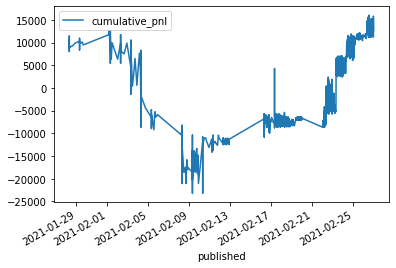

In [19]:
mrna_data_df.plot.line(x="published", y=["cumulative_pnl"])

#### 1.6.PENN 

In [20]:
cum_pnl = penn_data_df['pnl'].sum()
cum_return = cum_pnl / CAPITAL * 100
print('Cumulative pnl (USD):', cum_pnl)
print('Cumulative return (%) 121 days):', cum_return)
print('Cumulative pnl and return (%) annualised:', 365/121 * cum_return) 

Cumulative pnl (USD): -7430.541220457207
Cumulative return (%) 121 days): -74.30541220457206
Cumulative pnl and return (%) annualised: -224.14442524519671


<AxesSubplot:xlabel='published'>

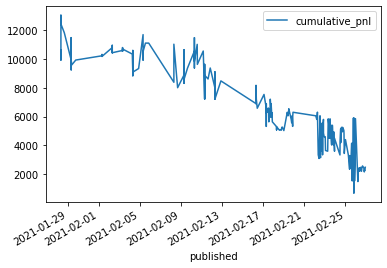

In [21]:
penn_data_df.plot.line(x="published", y=["cumulative_pnl"])

#### 1.6.NVDA

In [22]:
cum_pnl = nvda_data_df['pnl'].sum()
cum_return = cum_pnl / CAPITAL * 100
print('Cumulative pnl (USD):', cum_pnl)
print('Cumulative return (%) 121 days):', cum_return)
print('Cumulative pnl and return (%) annualised:', 365/121 * cum_return) 

Cumulative pnl (USD): 494.1811330169912
Cumulative return (%) 121 days): 4.941811330169912
Cumulative pnl and return (%) annualised: 14.907116822413371


<AxesSubplot:xlabel='published'>

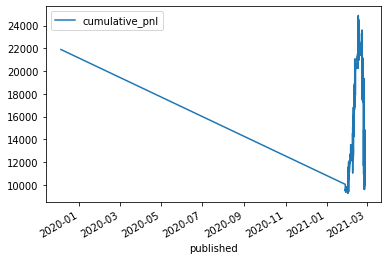

In [23]:
nvda_data_df.plot.line(x="published", y=["cumulative_pnl"])